# 🔢 PyTorch NN жишээ
шугаман NN загварыг PyTorch ашиглан хэрэгжүүлсэн жишээ

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1J2jY1w19GB97mv9nrPKK2yFoGNLsBvua?usp=sharing)

In [ ]:
!pip install torch==2.4.5

In [ ]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [ ]:
# 📦 Сангуудыг импортлох
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# 📚 Сургах өгөгдөл
X = torch.tensor([[4.0], [5.0], [10.0], [14.0]])
Y = torch.tensor([[60.0], [70.0], [130.0], [160.0]])

In [ ]:
# 🧠 Шугаман NN загвар тодорхойлох
class LinearNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearNNModel()

In [ ]:
# 🧠 Гүн NN (Deep Neural Network) загвар тодорхойлох
class DeepNNModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=32, output_dim=1):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # оролт -> нууц давхарга
            nn.ReLU(),                         # activation функц
            nn.Linear(hidden_dim, hidden_dim), # hidden давхарга
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)  # гаралт
        )

    def forward(self, x):
        return self.model(x)

# Загвар үүсгэх
model = DeepNNModel()

In [ ]:
# ⚙️ Алдагдлын функц ба optimizor
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Сургах давталт
num_epochs = 1500
for epoch in range(num_epochs):
    predictions = model(X)
    loss = criterion(predictions, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 19.2012
Epoch 50: Loss = 18.6832
Epoch 100: Loss = 18.3295
Epoch 150: Loss = 18.0879
Epoch 200: Loss = 17.9229
Epoch 250: Loss = 17.8103
Epoch 300: Loss = 17.7333
Epoch 350: Loss = 17.6807
Epoch 400: Loss = 17.6449
Epoch 450: Loss = 17.6204
Epoch 500: Loss = 17.6036
Epoch 550: Loss = 17.5922
Epoch 600: Loss = 17.5844
Epoch 650: Loss = 17.5791
Epoch 700: Loss = 17.5754
Epoch 750: Loss = 17.5729
Epoch 800: Loss = 17.5712
Epoch 850: Loss = 17.5701
Epoch 900: Loss = 17.5693
Epoch 950: Loss = 17.5687
Epoch 1000: Loss = 17.5683
Epoch 1050: Loss = 17.5681
Epoch 1100: Loss = 17.5679
Epoch 1150: Loss = 17.5678
Epoch 1200: Loss = 17.5677
Epoch 1250: Loss = 17.5677
Epoch 1300: Loss = 17.5676
Epoch 1350: Loss = 17.5676
Epoch 1400: Loss = 17.5676
Epoch 1450: Loss = 17.5676


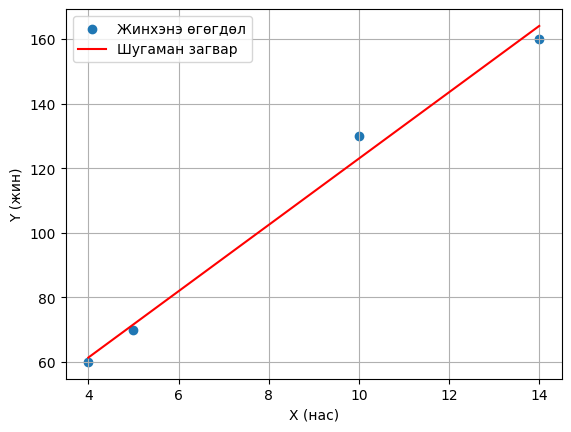

In [ ]:
# 📈 Үр дүнг дүрслэх
predicted = model(X).detach().numpy()
plt.scatter(X.numpy(), Y.numpy(), label="Жинхэнэ өгөгдөл")
plt.plot(X.numpy(), predicted, label="Шугаман загвар", color='red')
plt.xlabel("X (нас)")
plt.ylabel("Y (жин)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 📌 Жинхэнэ коэффициентүүдийг харуулах
[w1, w0] = list(model.parameters())
print(f"W1 : {w1.item():.2f}, W0 : {w0.item():.2f}")

W1 (налуу): 10.27, W0 (зүсэлт): 20.26
